In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

df_mturk_500 = pd.read_csv("500_batch_results.csv", error_bad_lines=False)
df_mturk_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HITId                        2500 non-null   object 
 1   HITTypeId                    2500 non-null   object 
 2   Title                        2500 non-null   object 
 3   Description                  2500 non-null   object 
 4   Keywords                     2500 non-null   object 
 5   Reward                       2500 non-null   object 
 6   CreationTime                 2500 non-null   object 
 7   MaxAssignments               2500 non-null   int64  
 8   RequesterAnnotation          2500 non-null   object 
 9   AssignmentDurationInSeconds  2500 non-null   int64  
 10  AutoApprovalDelayInSeconds   2500 non-null   int64  
 11  Expiration                   2500 non-null   object 
 12  NumberOfSimilarHITs          0 non-null      float64
 13  LifetimeInSeconds 

In [2]:
df_mturk_500_t = df_mturk_500[['WorkerId', 'WorkTimeInSeconds', 'Input.Original', 'Answer.privacy.label']]
UNIQUE_WORKERS = 5
HITS = df_mturk_500_t.shape[0]
df_mturk_500_t

,WorkerId,WorkTimeInSeconds,Input.Original,Answer.privacy.label
0,AOTNZ2CR4S0SL,14,"patents, designs, algorithms, utility models, ...",Privacy
1,A2WMX6GLWV0KC,251,"patents, designs, algorithms, utility models, ...",Privacy
2,A2G44A4ZPWRPXU,13,"patents, designs, algorithms, utility models, ...",Privacy
3,A1453O2WV1825Y,45,"patents, designs, algorithms, utility models, ...",Not privacy
4,A2UUQUAO917V8X,17,"patents, designs, algorithms, utility models, ...",Privacy
...,...,...,...,...
2495,A2IT8YJWT1MIKJ,13,"You shall not decompile, disassemble, electron...",Not privacy
2496,ACAG55WGVAEBW,12,"You shall not decompile, disassemble, electron...",Privacy
2497,A19334QPYR2HHO,14,"You shall not decompile, disassemble, electron...",Not privacy
2498,A1R5B8KT4EIIKB,46,"You shall not decompile, disassemble, electron...",Not privacy


<AxesSubplot:xlabel='Answer.privacy.label', ylabel='WorkTimeInSeconds'>

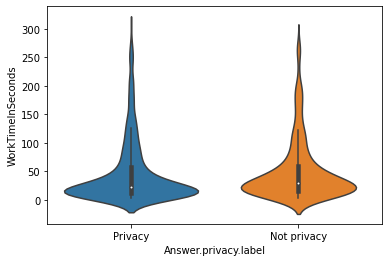

In [3]:
sns.violinplot(x=df_mturk_500_t['Answer.privacy.label'], y=df_mturk_500_t['WorkTimeInSeconds'])

In [4]:
# df_mturk_500_t_ascending = df_mturk_500_t.sort_values(by='WorkTimeInSeconds')
# df_mturk_500_t_ascending.to_csv(Path(os.getcwd() + "/" + "check_time.csv"), index=False)

In [5]:
from collections import Counter

df_mturk_500_t['Ratio'] = 0
for i in range(HITS):
    if i % UNIQUE_WORKERS == 0:
        counter = Counter(df_mturk_500_t.iloc[i:i+5]['Answer.privacy.label'])
        for j in range(UNIQUE_WORKERS):
            df_mturk_500_t['Ratio'][i+j]= counter['Privacy']
df_mturk_500_t
#df_mturk_500_t.to_csv(Path(os.getcwd() + "/" + "test_time.csv"), index=False)



<ipython-input-5-1c4b1a07efd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mturk_500_t['Ratio'] = 0
<ipython-input-5-1c4b1a07efd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mturk_500_t['Ratio'][i+j]= counter['Privacy']
C:\Users\USER-PC\anaconda3\envs\bert\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(

,WorkerId,WorkTimeInSeconds,Input.Original,Answer.privacy.label,Ratio
0,AOTNZ2CR4S0SL,14,"patents, designs, algorithms, utility models, ...",Privacy,4
1,A2WMX6GLWV0KC,251,"patents, designs, algorithms, utility models, ...",Privacy,4
2,A2G44A4ZPWRPXU,13,"patents, designs, algorithms, utility models, ...",Privacy,4
3,A1453O2WV1825Y,45,"patents, designs, algorithms, utility models, ...",Not privacy,4
4,A2UUQUAO917V8X,17,"patents, designs, algorithms, utility models, ...",Privacy,4
...,...,...,...,...,...
2495,A2IT8YJWT1MIKJ,13,"You shall not decompile, disassemble, electron...",Not privacy,2
2496,ACAG55WGVAEBW,12,"You shall not decompile, disassemble, electron...",Privacy,2
2497,A19334QPYR2HHO,14,"You shall not decompile, disassemble, electron...",Not privacy,2
2498,A1R5B8KT4EIIKB,46,"You shall not decompile, disassemble, electron...",Not privacy,2


In [6]:
df_privacy_ratio = pd.DataFrame(columns=['Original', 'PrivacyRatio'])
for i, row in df_mturk_500_t.iterrows():
    if i % UNIQUE_WORKERS == 0:
        new_row = {
            'Original': row['Input.Original'],
            'PrivacyRatio': row['Ratio']
        }
        df_privacy_ratio = df_privacy_ratio.append(new_row, ignore_index=True)
df_privacy_ratio

,Original,PrivacyRatio
0,"patents, designs, algorithms, utility models, ...",4
1,Continue shopping Go to cart OK Home > Terms &...,3
2,The following Sections of this PSO Addendum wi...,3
3,Lingo Bingo (“Prize Draw”) is organised by Hut...,0
4,Chronus will consider all the available inform...,5
...,...,...
495,Your use of the Myntra and services and tools ...,4
496,Privacy Policy-Terms & Conditions-News-Donate-...,5
497,Copyright Policy Reporting Claims of Copyright...,4
498,Your location information: We collect informat...,3


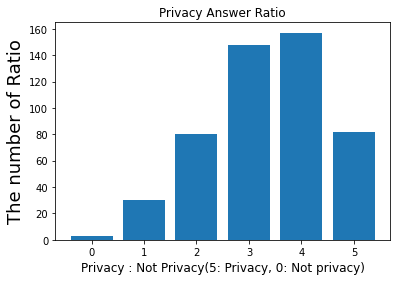

In [7]:
labels, values = zip(*sorted(Counter(df_privacy_ratio['PrivacyRatio']).items()))

indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.title('Privacy Answer Ratio')
plt.xlabel('Privacy : Not Privacy(5: Privacy, 0: Not privacy)', fontsize=12)
plt.ylabel('The number of Ratio', fontsize=18)
plt.show()

In [8]:
# Convent privacy to 0.
# Convert not privacy to 1.
# for i in range(HITS):
#     if df_mturk_500_t['Answer.privacy.label'][i] == 'Privacy':
#         df_mturk_500_t['Answer.privacy.label'][i] = 0
#     elif df_mturk_500_t['Answer.privacy.label'][i] == 'Not privacy':
#         df_mturk_500_t['Answer.privacy.label'][i] = 1
# df_mturk_500_t

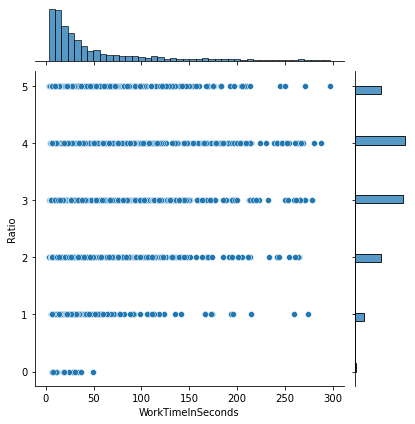

In [9]:
sns.jointplot(x='WorkTimeInSeconds', y='Ratio', data=df_mturk_500_t)

In [ ]:
# 해야 될 것.
# 시간이 20초 아래면서 비율에 반하는 의견을 제시한 워커 추출. 각 문장 당 표시.
# 각 문장 당 invalid 워커의 수를 새로운 컬럼에 표시.
